# ELECTION FORECASTING REVISITED

In the recitation from Unit 3, we used logistic regression on polling data in order to construct US presidential election predictions. We separated our data into a training set, containing data from 2004 and 2008 polls, and a test set, containing the data from 2012 polls. We then proceeded to develop a logistic regression model to forecast the 2012 US presidential election.

In this homework problem, we'll revisit our logistic regression model from Unit 3, and learn how to plot the output on a map of the United States. Unlike what we did in the Crime lecture, this time we'll be plotting predictions rather than data!

First, load the ggplot2, maps, and ggmap packages using the library function. All three packages should be installed on your computer from lecture, but if not, you may need to install them too using the install.packages function.

Then, load the US map and save it to the variable statesMap, like we did during the Crime lecture:

statesMap = map_data("state")

The maps package contains other built-in maps, including a US county map, a world map, and maps for France and Italy.

In [9]:
polling = read.csv('data/PollingImputed.csv')
str(polling)

'data.frame':	145 obs. of  7 variables:
 $ State     : Factor w/ 50 levels "Alabama","Alaska",..: 1 1 2 2 3 3 3 4 4 4 ...
 $ Year      : int  2004 2008 2004 2008 2004 2008 2012 2004 2008 2012 ...
 $ Rasmussen : int  11 21 19 16 5 5 8 7 10 13 ...
 $ SurveyUSA : int  18 25 21 18 15 3 5 5 7 21 ...
 $ DiffCount : int  5 5 1 6 8 9 4 8 5 2 ...
 $ PropR     : num  1 1 1 1 1 ...
 $ Republican: int  1 1 1 1 1 1 1 1 1 1 ...


In [6]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=6, repr.plot.height=3)

library(maps)
library(ggmap)
library(ggplot2)

In [7]:
statesMap = map_data("state")

## Drawing a map of the US

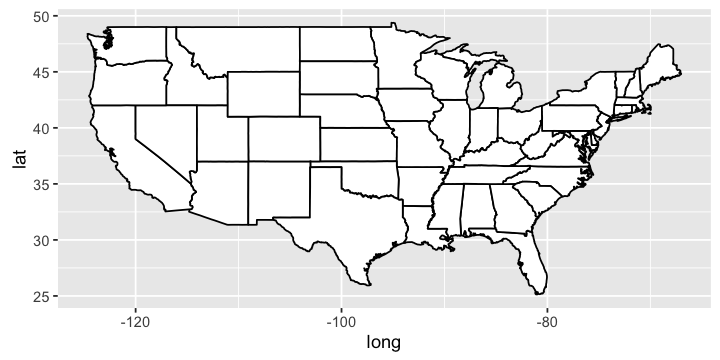

In [8]:
ggplot(statesMap, aes(x = long, y = lat, group = group)) + 
    geom_polygon(fill = "white", color = "black")

# Coloring the States by Predictions

Now, let's color the map of the US according to our 2012 US presidential election predictions from the Unit 3 Recitation. We'll rebuild the model here, using the dataset PollingImputed.csv. Be sure to use this file so that you don't have to redo the imputation to fill in the missing values, like we did in the Unit 3 Recitation.

Load the data using the read.csv function, and call it "polling". Then split the data using the subset function into a training set called "Train" that has observations from 2004 and 2008, and a testing set called "Test" that has observations from 2012.

Note that we only have 45 states in our testing set, since we are missing observations for Alaska, Delaware, Alabama, Wyoming, and Vermont, so these states will not appear colored in our map.

Then, create a logistic regression model and make predictions on the test set using the following commands:

```
mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")

TestPrediction = predict(mod2, newdata=Test, type="response")
```

TestPrediction gives the predicted probabilities for each state, but let's also create a vector of Republican/Democrat predictions by using the following command:
```
TestPredictionBinary = as.numeric(TestPrediction > 0.5)
```

Now, put the predictions and state labels in a data.frame so that we can use ggplot:
```
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)
```

To make sure everything went smoothly, answer the following questions.

For how many states is our binary prediction 1 (for 2012), corresponding to Republican?

In [10]:
Train = subset(polling, Year==2004| Year ==2008)
Test = subset(polling, Year==2012)

In [11]:
mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")
TestPrediction = predict(mod2, newdata=Test, type="response")

In [12]:
TestPredictionBinary = as.numeric(TestPrediction > 0.5)
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)

In [13]:
str(predictionDataFrame)

'data.frame':	45 obs. of  3 variables:
 $ TestPrediction      : num  9.74e-01 9.99e-01 9.26e-05 9.43e-03 3.43e-05 ...
 $ TestPredictionBinary: num  1 1 0 0 0 1 1 0 1 0 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 4 5 6 7 9 10 11 12 13 ...


In [14]:
sum(predictionDataFrame$TestPredictionBinary)

[1] 22

In [15]:
mean(predictionDataFrame$TestPrediction)

[1] 0.4852626

# Coloring the States by Predictions

Now, we need to merge "predictionDataFrame" with the map data "statesMap", like we did in lecture. Before doing so, we need to convert the Test.State variable to lowercase, so that it matches the region variable in statesMap. Do this by typing the following in your R console:

`predictionDataFrame$region = tolower(predictionDataFrame$Test.State)`

Now, merge the two data frames using the following command:

`predictionMap = merge(statesMap, predictionDataFrame, by = "region")`

Lastly, we need to make sure the observations are in order so that the map is drawn properly, by typing the following:

`predictionMap = predictionMap[order(predictionMap$order),]`

In [16]:
predictionDataFrame$region = tolower(predictionDataFrame$Test.State)
predictionMap = merge(statesMap, predictionDataFrame, by = "region")
predictionMap = predictionMap[order(predictionMap$order),]

In [20]:
nrow(predictionMap)

[1] 15034

In [21]:
nrow(statesMap)

[1] 15537

Because we only make predictions for 45 states, we no longer have observations for some of the states. These observations were removed in the merging process.

# Coloring the States by Predictions

Now we are ready to color the US map with our predictions! You can color the states according to our binary predictions by typing the following in your R console:

`ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) + geom_polygon(color = "black")`

The states appear light blue and dark blue in this map. Which color represents a Republican prediction?

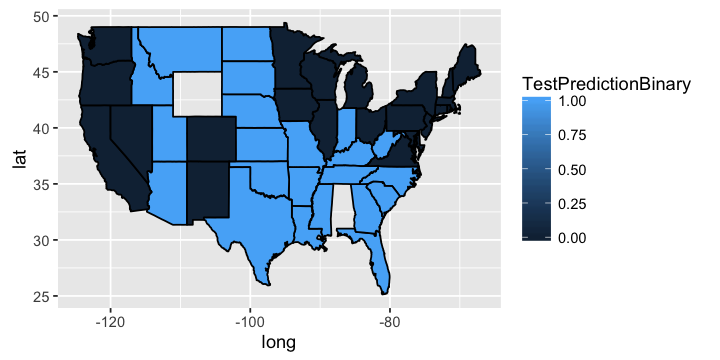

In [22]:
ggplot(predictionMap,
       aes(x = long, y = lat, 
           group = group, 
           fill = TestPredictionBinary)) + 
    geom_polygon(color = "black")

We see that the legend displays a blue gradient for outcomes between 0 and 1. However, when plotting the binary predictions there are only two possible outcomes: 0 or 1. Let's replot the map with discrete outcomes. We can also change the color scheme to blue and red, to match the blue color associated with the Democratic Party in the US and the red color associated with the Republican Party in the US. This can be done with the following command:

```
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary))+ geom_polygon(color = "black") + scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")
```

Alternatively, we could plot the probabilities instead of the binary predictions. Change the plot command above to instead color the states by the variable TestPrediction. You should see a gradient of colors ranging from red to blue. Do the colors of the states in the map for TestPrediction look different from the colors of the states in the map with TestPredictionBinary? Why or why not?

NOTE: If you have a hard time seeing the red/blue gradient, feel free to change the color scheme, by changing the arguments low = "blue" and high = "red" to colors of your choice (to see all of the color options in R, type colors() in your R console). You can even change it to a gray scale, by changing the low and high colors to "gray" and "black".

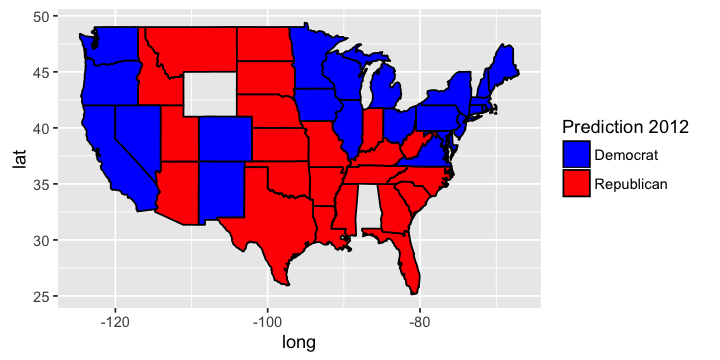

In [23]:
ggplot(predictionMap, 
       aes(x = long, y = lat, 
           group = group, 
           fill = TestPredictionBinary))+ 
    geom_polygon(color = "black") + 
    scale_fill_gradient(low = "blue", high = "red", 
                        guide = "legend", 
                        breaks= c(0,1), 
                        labels = c("Democrat", "Republican"), 
                        name = "Prediction 2012")

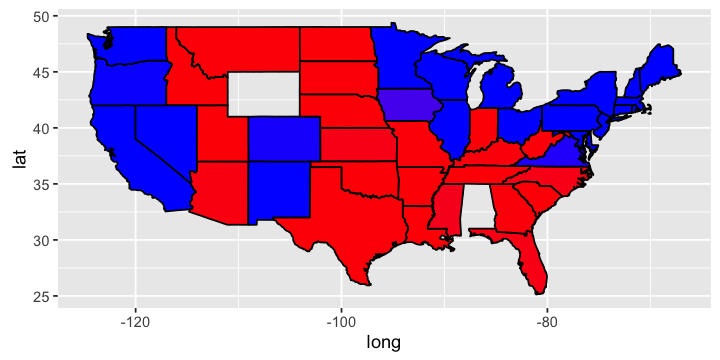

In [24]:
ggplot(predictionMap, 
       aes(x = long, y = lat, 
           group = group, 
           fill = TestPrediction))+ 
    geom_polygon(color = "black") + 
    scale_fill_gradient(low = "blue", high = "red", 
                        guide = "legend", 
                        breaks= c(0,1), 
                        labels = c("Democrat", "Republican"), 
                        name = "Prediction 2012")

In [25]:
table(Test$Republican, TestPredictionBinary)

   TestPredictionBinary
     0  1
  0 23  1
  1  0 21

In [26]:
subset(Test, TestPredictionBinary == 1 & Republican ==0)

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
24,Florida,2012,2,0,6,0.6666667,0


In [27]:
TestPrediction[Test$State=="Florida"]

24 
0.9640395

In [28]:
?geom_polygon

geom_polygon {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes or aes_. If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot. A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame., and will be used as the layer data."
stat,"The statistical transformation to use on the data for this layer, as a string."
position,"Position adjustment, either as a string, or the result of a call to a position adjustment function."
...,"other arguments passed on to layer. These are often aesthetics, used to set an aesthetic to a fixed value, like color = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
na.rm,"If FALSE (the default), removes missing values with a warning. If TRUE silently removes missing values."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders."


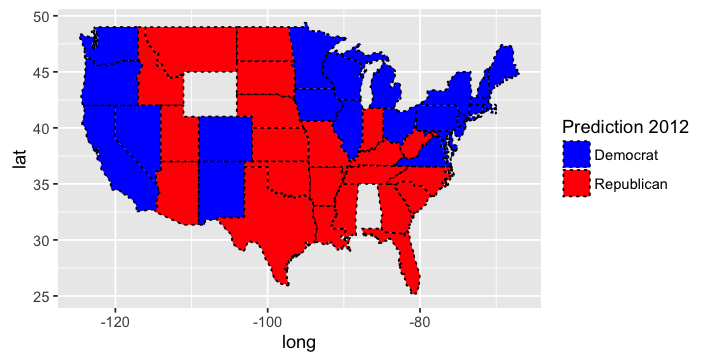

In [29]:
ggplot(predictionMap, 
       aes(x = long, y = lat, 
           group = group, 
           fill = TestPredictionBinary))+ 
    geom_polygon(color = "black", linetype=3) + 
    scale_fill_gradient(low = "blue", high = "red", 
                        guide = "legend", 
                        breaks= c(0,1), 
                        labels = c("Democrat", "Republican"), 
                        name = "Prediction 2012")

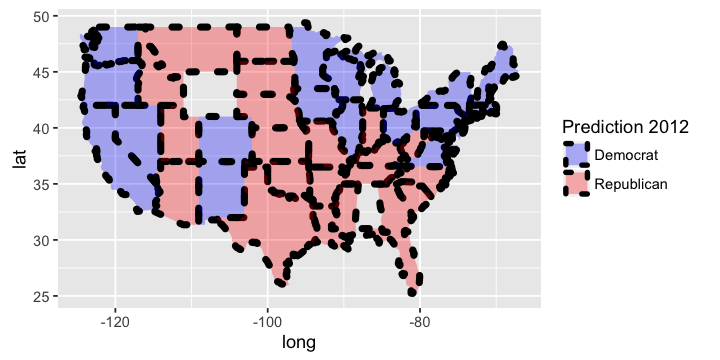

In [32]:
# size, linetype, alpha
ggplot(predictionMap, 
       aes(x = long, y = lat, 
           group = group, 
           fill = TestPredictionBinary))+ 
    geom_polygon(color = "black", size=2, linetype=3, alpha=0.3) + 
    scale_fill_gradient(low = "blue", high = "red", 
                        guide = "legend", 
                        breaks= c(0,1), 
                        labels = c("Democrat", "Republican"), 
                        name = "Prediction 2012")